# Data Set <a name="dataset"></a>

We will use the dataset from [UCI repository for Bank Marketing Data Set](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### Data Dictionary (Feature Information)

###### 1. Bank Client Information
| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|1|  **age** |(numeric)|
|2|  **job** | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|
|3| **marital**| marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|
|4| **education** |(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')|
|5| **default**| has credit in default? (categorical: 'no','yes','unknown')|
|6| **balance**| how much credit card balance|
|7| **housing**| has housing loan? (categorical: 'no','yes','unknown')|
|8| **loan**| has personal loan? (categorical: 'no','yes','unknown')|




###### 2. Attributes related with the last contact of the current campaign

| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|9|**contact**| contact communication type (categorical: 'cellular','telephone')| 
|10|**day**| last contact day of month (categorical: '1', '2', '3', ..., '30', '31')|
|11|**month**| last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')|
|12|**duration**|last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|

###### 3. other attributes

| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|13|**campaign**|number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|14|**pdays**|number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)|
|15|**previous**|number of contacts performed before this campaign and for this client (numeric)|
|16|**poutcome**|outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |



###### 4. Output variable (desired target) 
| col num| feature name| feature description |
|--------|:-----------:|:--------------------|
|17|**y**| has the client subscribed a term deposit? (binary: 'yes','no')|







#### Python Package Dependencies

We will use the [scikit learn package](http://scikit-learn.org/stable/documentation.html) for this task. Next few cells load the libraries needed for this notebook. 

In [163]:
# load pandas for 
##   1. reading various files into the dataframe
##   2. to performa various data manipulation tasks

import pandas as pd

# load numpy
import numpy as np

#  Exploratory Data Analysis (EDA)


Before build machine learning model, we need to explore data set so that one can get as much insight as possible, it is also good for feature engineering.

#### Data loading 

I will use [pandas](https://pandas.pydata.org/) to read data and create dataframe. 
   


In [84]:
 df = pd.read_csv("bank.csv", header=0, sep=";")

In [85]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [143]:
print(df.shape)

(4521, 17)


### Check for duplicates

In [145]:
print('data duplicated:{}'.format(df.duplicated().sum()))

data duplicated:0


### Check for Missing Values

In [146]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Explore Output Variable


##### Positive and Negative Class Distribution.

We know the output i.e client response 'y' can be 'yes' or 'no'. Lets see it's relative frequencies.
Since we are interested in predicting when client is going to subscribe, out positive sample is 'yes' and negative samples is 'no'



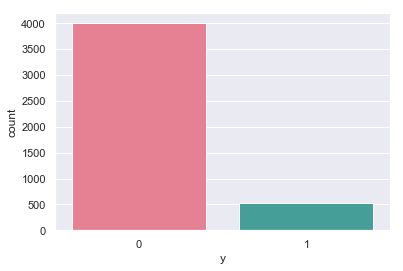

In [141]:
sns.countplot(x='y', data=df, palette='husl')
plt.show()

### Explore Input Variable
#### Corelation of the numeric columns

Lets plot the distribution of the features and their cross co-relation to get the information about reduntant features.

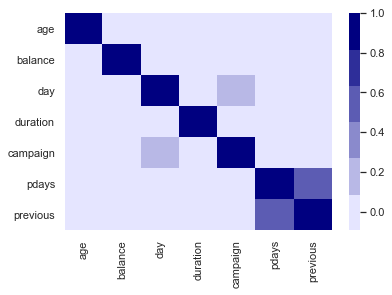

In [148]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# find the corelation between inputs
corr = df[num_cols].corr()

# plot heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            cmap=sns.light_palette("navy"),
           )
plt.show()

# Data Preprocessing
For the input features we will do the following 

* Numeric attributes: 
    * select numerical attributes.
    * impute missing values of a feature using the median of the feature, if any
    * scale values of a feature by shifting it by it's mean and dividing by standard deviation.
* Categorical attributes:
    * select categorical attributes.
    * for each of the columns perform one hot encoding

In [149]:
##Scale the columns consist of numerical  values####
scaler = StandardScaler()
scale_index=['age','balance','day','duration','campaign','pdays','previous']# Numerical column index
no_y=df[df.columns[:-1]] # drop the target variable, we don't want to scale it!
num=no_y[scale_index]
num= scaler.fit_transform(num)
num=pd.DataFrame(num)
num.columns=scale_index
num.head()

/Users/yangjian/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yangjian/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,balance,day,duration,campaign,pdays,previous
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413


In [150]:
## Replace the target variable with 0 and 1
df.replace(('yes', 'no'), (1, 0), inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [151]:
##Apply One-hot-encoding to the categorical variables
df_new=pd.get_dummies(df.drop(['age','balance','day','duration','campaign','pdays','previous','y'],axis=1))
df_new.head()

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [152]:
## transform target variable to pandas data frame
response=pd.DataFrame(df['y'])
response.head()

,y
0,0
1,0
2,0
3,0
4,0


In [153]:
##Merge the scaled data and post one-hot-encoding data
df_combine=pd.concat([num,df_new],axis=1)
df_combine.head()
df_combine_1=pd.concat([df_combine,response],axis=1) # Adding the target variable "y"

In [154]:
df_combine_1.head()
##Final cleaned data for modeling

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0,1,1,...,0,1,0,0,0,1,0,0,0,0
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,0,1,0,...,0,1,0,0,0,0,0,0,1,0


# Create Helper functions

Model training is the iterative process and we would now build various helper function which will be used later on multiple times. I will explain the details while developing each of helper utilities.

 ### Create the xgboost classifier with default parameters, for simplicity reason. I will tune the hyper parameter later in time

In [105]:

def create_xgb_clf(clf_param=None):
    
    
    param = {}
 
    
    param['scale_pos_weight']= 1

    if clf_param:
       for k, v in clf_param.items():
          param[k] = clf_param[k]
            
    xgb_model = XGBClassifier(**param)
    return xgb_model

### plot the confusion matrix

In [106]:
#plot the confusion matrix
def plot_cm(y_test_act, y_test_pred, title="Confusion Matrix", cmap="Blues"):
    """
    plot the confusion matrix given the test label and predicted label.
    
    @arguements:
    y_test_act -- actual label (0 or 1) of the data set.
    y_test_pred -- model's predicted label (o or 1) of the data set.
    title -- title string to be put on plot. default -- Confusion Matrix
    cmap -- matplotlib color palette to be used. default -- Blues
    """
    
    fig, ax = plt.subplots()
    cm = confusion_matrix(y_test_act, y_test_pred)
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = cmap, ax = ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted class")
    ax.set_ylabel("Actual class")
    plt.show()

### plot the ROC, Precision-Recall Curve

In [107]:
def plot_pr_roc(y_act, y_score, label = "", color='b', show=False, tag=""):
    """
    plot both precision recall and ROC curve 
    arguements:
    y_act -- Actual label of the class on the test data.
    y_score -- Actual probabilities as predicted by model on the test data.
    color (default:blue) -- color of plot
    show (default:False) -- flag to control whether to show plot or user will call plt.show() oneself.
    """
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.025,1.025])
    ax1.set_ylim([-0.025,1.025])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve ' + tag)

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim([-0.025,1.025])
    ax2.set_ylim([-0.025,1.025])
    ax2.set_xlabel('False Positive Rate (FPR)')
    ax2.set_ylabel('True Positive Rate (TPR)')
    ax2.set_title('ROC Curve ' + tag)

    pr,rc,_ = precision_recall_curve(y_act, y_score)
    tpr,fpr,_ = roc_curve(y_act, y_score)
    
    ax1.plot(rc,pr,c=color,label=label)
    ax2.plot(tpr,fpr,c=color,label=label)
    ax2.plot([0,1], [0,1], 'k--')
    
    ax1.legend(loc='lower left')    
    ax2.legend(loc='lower left')
    
    if show:
        plt.show()

In [108]:
def plot_pr_vs_th(y_act, y_score, show=True, tag=""):
    """
    plot precision and recall vs threshold on same plot
    
    arguements: 
    y_act -- Actual label of the class on the test data.
    y_score -- Actual probabilities as predicted by model on the test data.
    """
    
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.25,1.25])
    ax1.set_ylim([-0.025,1.025])
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Precision and Recall')
    ax1.set_title("Precision, Recall Curve vs Threshold " + tag)

    pr,rc,th = precision_recall_curve(y_act, y_score)
    
    ax1.plot(th,pr[:-1], "b--",label="Precision")
    ax1.plot(th,rc[:-1], "g-",label="Recall")
    
    ax1.legend(loc='upper left')
    
    if show:
        plt.show()

### Create classification report

In [109]:
def report_clf(y_act, y_pred, y_proba, title="", cmap="Blues"):
    """
     create the classification reports with confusion matrix
     arguement:
     y_act -- Actual label of the class on the test data.
     y_pred -- Prediction by model on the test data.
     y_proba -- Probabilities as predicted by model on the test data.
    """
    plot_pr_roc(y_act, y_proba, "", "darkorange", True, title)  
    plot_cm(y_act, y_pred, title + " Confusion Matrix", cmap) 
    print("\n\n Classification Report ", title, "\n\n")  
    print(classification_report(y_act, y_pred))



###  Other helper functions

In [110]:
def create_xgb_weights(w, X, y):
    """
    helper routine to create  weight of size y .All the values are same i.e w
    """
    r = y.copy()
    r[r == 1] = w  
    r[r == 0] = 1
    return r 


def find_cv_model_predict(xgb_model, X, y, weight=1):
    """
    utility function to find the best model using k fold cross validation
    
    arguements: 
    xgb_model-- xgboost model
    X -- transformed input dataset
    y -- corresponding output dataset
    weight -- weight to apply to positive sample. Default to 1 and we will see how it can be used with different weights.
    
    return: cross validated model with k == 3. It will return prob as well as prediction
    """
    
    # get the weights of w of size y
    y_wts = create_xgb_weights(weight, X, y)
    
    # get prediction
    y_proba = cross_val_predict(
                xgb_model, X, y, cv=3, method="predict_proba",
                fit_params={'eval_metric':'auc',
                           'sample_weight':y_wts})
    
    # get probabilies
    y_pred = cross_val_predict(
                xgb_model, X, y, cv=3, method="predict",
                fit_params={'eval_metric':'auc',
                           'sample_weight':y_wts})
    
    # result
    res = {
        'model': xgb_model,
        'X':X,
        'y':y,
        'weight': weight,
        'proba':y_proba,
        'pred':y_pred,
    }
    
    return res




In [155]:

# for preprocessing
from sklearn import preprocessing

# for custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# for creating pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

# for cross validation


from sklearn.model_selection import cross_val_predict, cross_val_score

# for various metrics and reporting
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# feature selection
from sklearn.feature_selection import SelectFromModel

# xgboost library
from xgboost import XGBClassifier

# plot feature importance
from xgboost import plot_importance, plot_tree


### Model Training--Initial try

Now it's time to train the model using cross validation and get the predicted probabilities and predicted results.

We will use the helper function find_cv_model_predict.

In [156]:
# fit the model
X = df_combine_1[df_combine_1.columns[:-1].tolist()]#select all the factors except target variable, in this case, the target variable is in the lst column
   
y = df_combine_1['y']
# we would like to split it using the stratified samples so that all the representative of each class is there
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

xgb_model = create_xgb_clf({'scale_pos_weight':1})


# use cross validation to find best model
xgb_predict_obj = find_cv_model_predict(xgb_model, X_train, y_train, weight=1)

xgb_cls_1_proba = xgb_predict_obj['proba'][:,1]
xgb_y_pred = xgb_predict_obj['pred']

tr=pd.DataFrame(X_train)
tr.head()
xgb_predict_obj

{'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
 'X':            age   balance       day  duration  campaign     pdays   previous  \
 58   -0.488896 -0.439190  1.222871  0.192584 -0.576829 -0.407218  -0.320413   
 2270  1.686036 -0.366748 -1.323585 -0.465544  0.066368 -0.407218  -0.320413   
 382   1.686036  2.742607  1.344131 -0.115312 -0.255231 -0.407218  -0.320413   
 2531  2.442535 -0.241470 -1.444845 -0.719558 -0.255231 -0.407218  -0.320413   
 3776 -0.488896 -0.476408 -1.323585 -0.430906 -0.255231 -0.407218  -0.320413   
 3155  1.307787 -0.706362 -0.959806 -0.542518  0.066368 -0.407218  -0.320413   
 867  -0.772583 -0.261408 -0.83

# Common hyper parameters we can tune
### Learning rate:
I usually set the values as 0.1 or less.
### max_depth :
By default is 3, means the the maximum depth of a tree, used to control over-fitting as higher depth 
### subsample
Denotes the fraction of observations to be randomly sampled for each tree to train
### colsample_bytree 
Denotes the percentage  of columns to be randomly samples for each tree, by default is 1, means I chose all the features for now
### n_jobs
the number of parallel threads used to run xgboost, improve the speed further
### scale_pos_weight: 
Balance the positive and negative weights, positive/negative


#  Analysis of the classification 

Lets measure the performance of the model by using previous helper functions.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


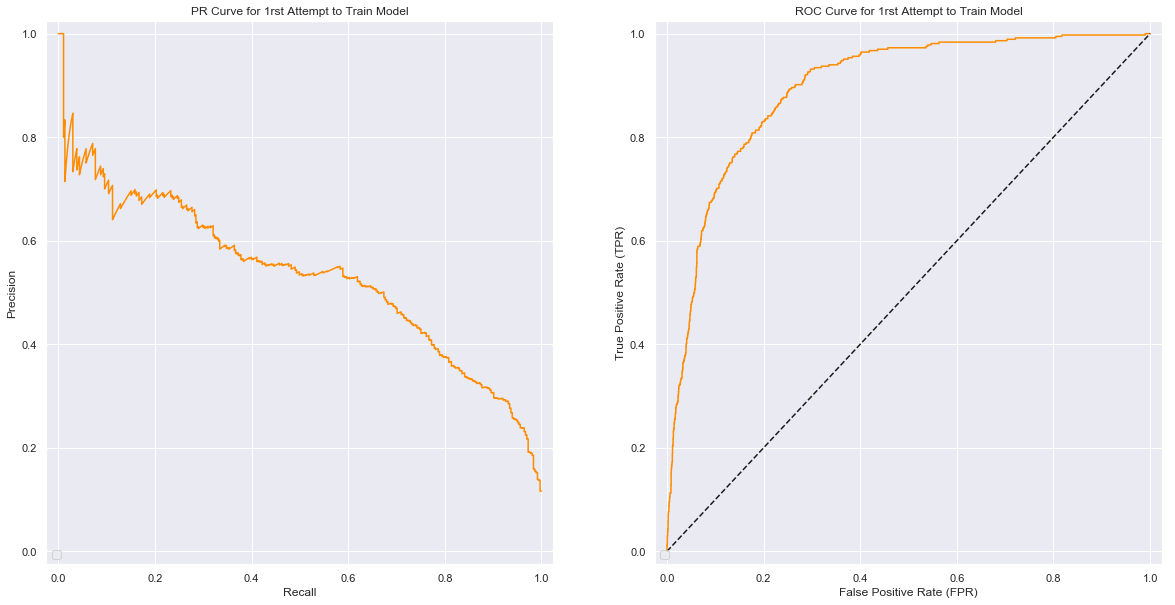

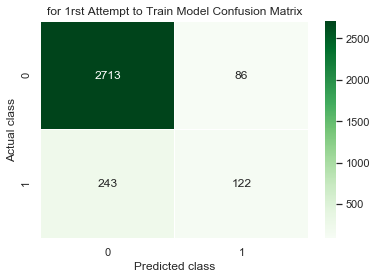



 Classification Report  for 1rst Attempt to Train Model 


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2799
           1       0.59      0.33      0.43       365

   micro avg       0.90      0.90      0.90      3164
   macro avg       0.75      0.65      0.68      3164
weighted avg       0.88      0.90      0.88      3164



In [157]:
# load matplot lib for various plotting
import matplotlib.pyplot as plt
plt.rc("font", size=14)

# we will use the seaborn for visually appealing plots
import seaborn as sns
sns.set() # set the seaborn stylesheet
#sns.set(style="white")
#sns.set(style="whitegrid")
report_clf(y_train, xgb_y_pred, xgb_cls_1_proba, title="for 1rst Attempt to Train Model", cmap="Greens")



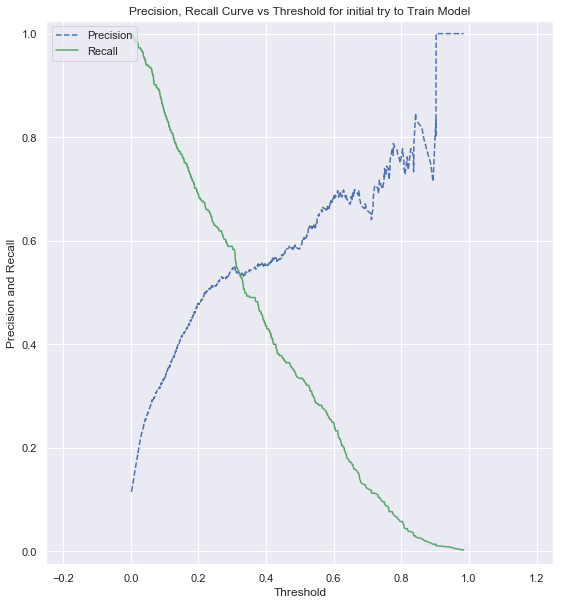

In [159]:
# plot the precision and recall against threshold


plot_pr_vs_th(y_train, xgb_cls_1_proba, show=True, tag="for initial try to Train Model")



##### ROC Curve

1) We can see that ROC curve is not hugging the top left corner. So ROC curve is not giving use the proper lift. What's wrong with it? The main reason for this is the class imbalances. i.e number of positive testcase i.e user said yes and subscribed a term deposit is much less than people who said "no"

2) Typically in these cases of the imbalance class , you use the precision recall curve with a specific threshold, rather than roc curve, I will explore with the precision recall curve and the confusion matrix to solve the problem. 

##### Precision Recall Curve

1) As I pointed out that for the imbalance dataset, the precision recall curve is better.

2) if we want to find all the guys who are likely to subscribe, we should aim for higher recall as explained in previous sections.


##### Confusion Matrix

1) For the imbalance data, we can see the confusion matrix is not balanced, i.e TPR and FPR are less.

2) We note that overall recall is 0.9 but for positive class (which we care more), it is only 0.33 and we would want to improve it.

##### precision and recall vs threshold

1) We also plotted, precision recall vs threshold and since for us recall is more important so we should choose our threshold accordingly.



### Strategy For Better Classifier for the Imbalance Data 

Can we do better than the current performance? The answer is yes and typically in these cases, we follow the following 
techniques.

1) Use the weighted class i.e give higher weight for the class 1 i.e 'yes'

2) OverSampling of the Minority class and Undersampling of the minority class

3) Use the SMOTE (synthetic Minority class oversampling)
   

### Model Training--Second try using Weighted Samples ( I test various weights here)

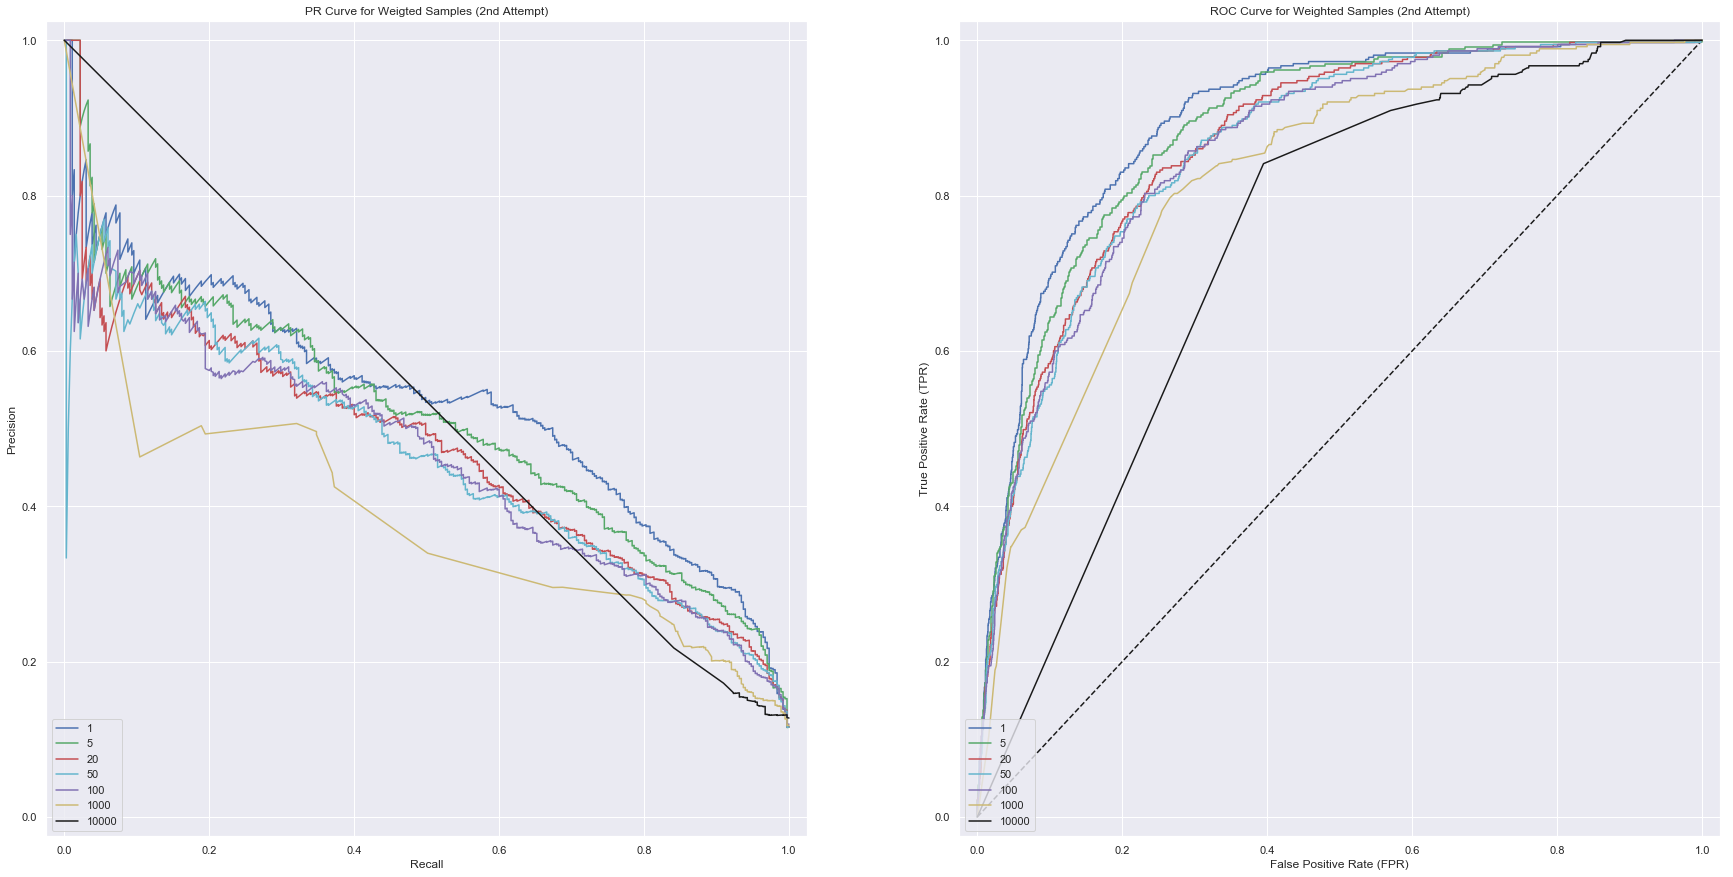

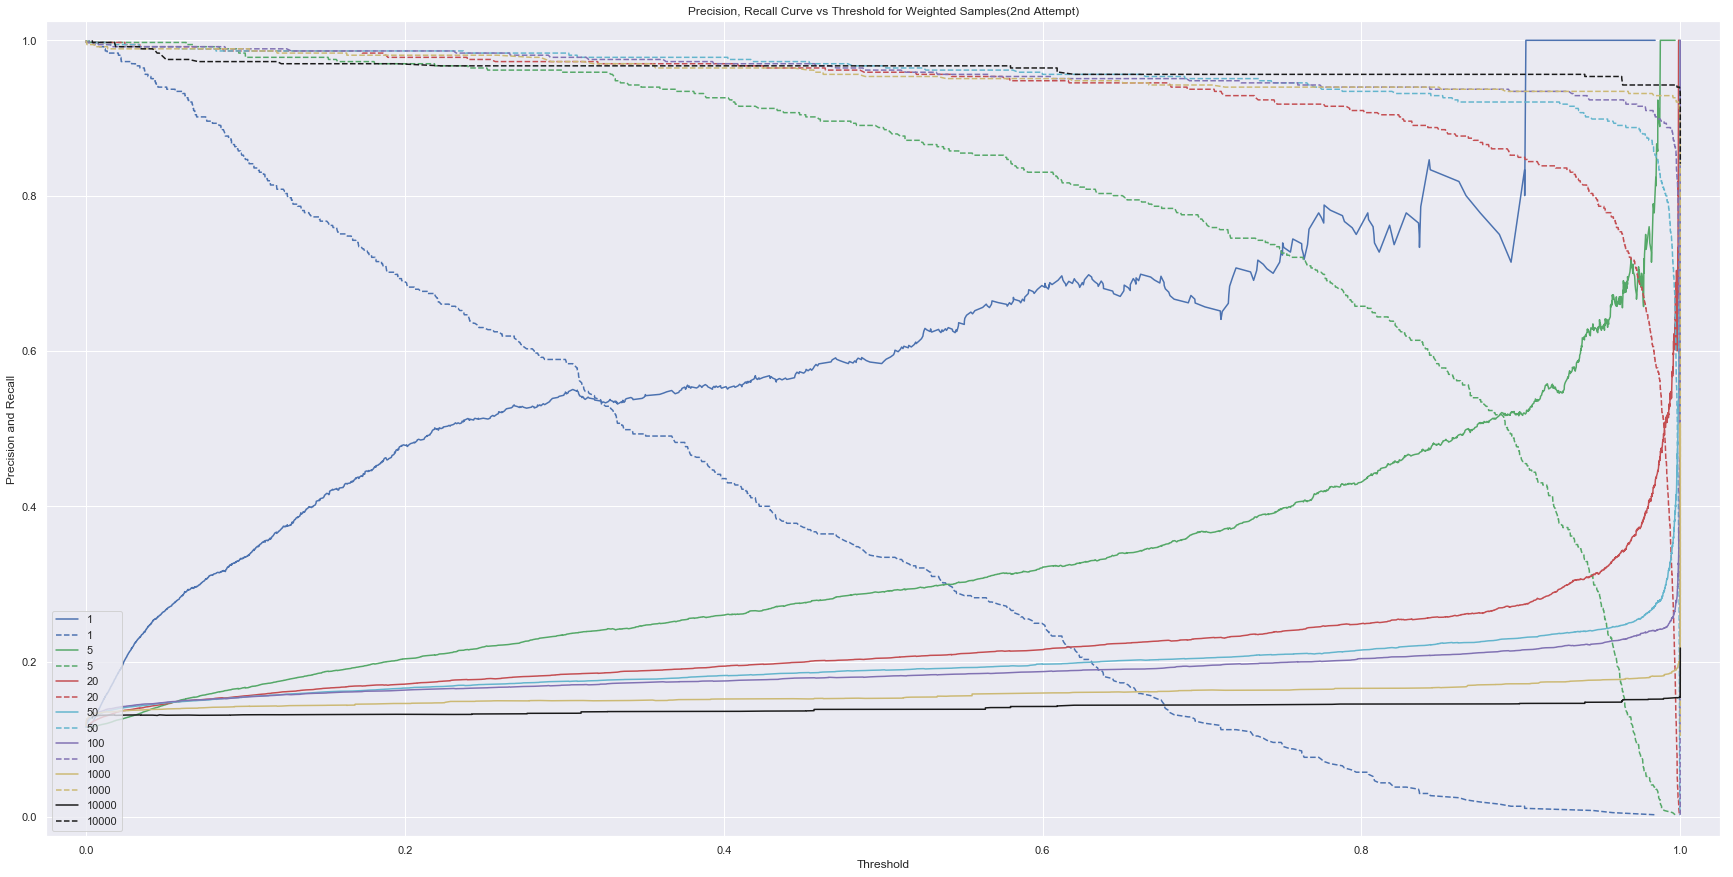

In [160]:



# setup the figure
fig1 = plt.figure(figsize=(30,15))

# plot one for PR curve
ax1 = fig1.add_subplot(1,2,1)
ax1.set_xlim([-0.025,1.025])
ax1.set_ylim([-0.025,1.025])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve for Weigted Samples (2nd Attempt)')

# plot 2 for ROC curve
ax2 = fig1.add_subplot(1,2,2)
ax2.set_xlim([-0.025,1.025])
ax2.set_ylim([-0.025,1.025])
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('ROC Curve for Weighted Samples (2nd Attempt)')

# plot the baseline ROC curve     
ax2.plot([0,1], [0,1], 'k--')
    

fig2 = plt.figure(figsize=(30,15))    
# plot 3 for precision recall vs threshold curve
ax3 = fig2.add_subplot(1,1,1)
ax3.set_xlim([-0.025,1.025])
ax3.set_ylim([-0.025,1.025])
ax3.set_xlabel('Threshold')
ax3.set_ylabel('Precision and Recall')
ax3.set_title('Precision, Recall Curve vs Threshold for Weighted Samples(2nd Attempt)')


    

xgb_models = {}
# try various weights and plot on the same figure for better comparasion
for pos_sample_weight, color in zip([1,5,20,50,100, 1000, 10000],'bgrcmykw'):
  

  # create a model with pos_sample_weight and other default params
  xgb_model = create_xgb_clf({'scale_pos_weight':pos_sample_weight})
  
  # store the model for future use
  xgb_models[pos_sample_weight] = xgb_model
    
  # find the prediction with probabilities for pos_sample_weight
  xgb_predict_obj = find_cv_model_predict(xgb_model, X_train, y_train, weight=pos_sample_weight)

  xgb_cls_1_proba = xgb_predict_obj['proba'][:,1]
  xgb_y_pred = xgb_predict_obj['pred']
  y_act = y_train
  y_score = xgb_cls_1_proba
  label =  pos_sample_weight 
  pr,rc, pr_th = precision_recall_curve(y_act, y_score)
  tpr,fpr,_ = roc_curve(y_act, y_score)
    
  ax1.plot(rc,pr,c=color,label=label)
  ax2.plot(tpr,fpr,c=color,label=label)
 
  ax3.plot(pr_th,pr[:-1], c=color,label=label)
  ax3.plot(pr_th,rc[:-1], "--", c=color,label=label)
    
    
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')
ax3.legend(loc='lower left')

plt.show() 

### Analysis
Hence, I want to have higher recall even though with not good enough precision.

Lets look at bottom picture, for Precision,Recall vs Threshold curve.
dashed lines are recall and solid lines are precision. We see that golden color lines have good balance of higher recall and good enough precision. Which corresponds to weight 1000.

For the weight of 1000 i,e golden line, both the top figure for ROC and Precision vs Recall curve is also reasonable and hence we will go with that weight.


Lets also see the confusion matrix and classification report for the best weighted models


No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.99995947 0.00295307 0.99997425 ... 0.99996305 0.99930036 0.99862397]
[1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1]


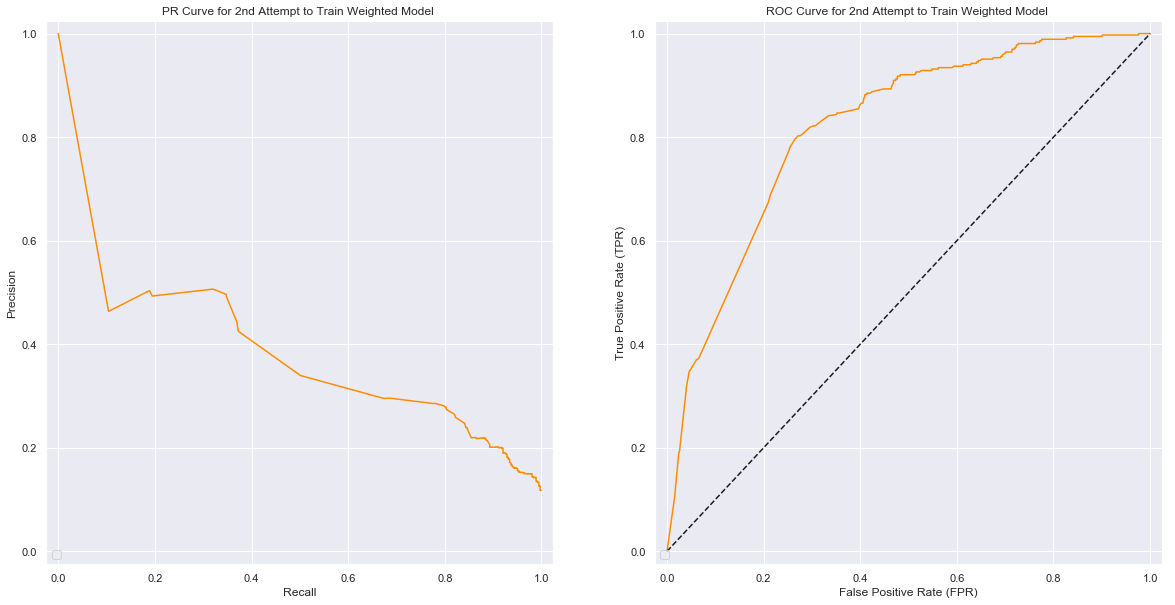

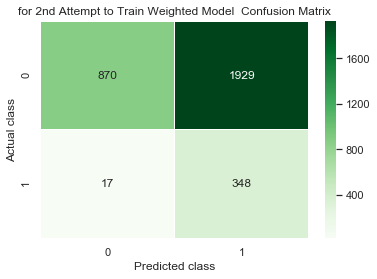



 Classification Report  for 2nd Attempt to Train Weighted Model  


              precision    recall  f1-score   support

           0       0.98      0.31      0.47      2799
           1       0.15      0.95      0.26       365

   micro avg       0.38      0.38      0.38      3164
   macro avg       0.57      0.63      0.37      3164
weighted avg       0.89      0.38      0.45      3164



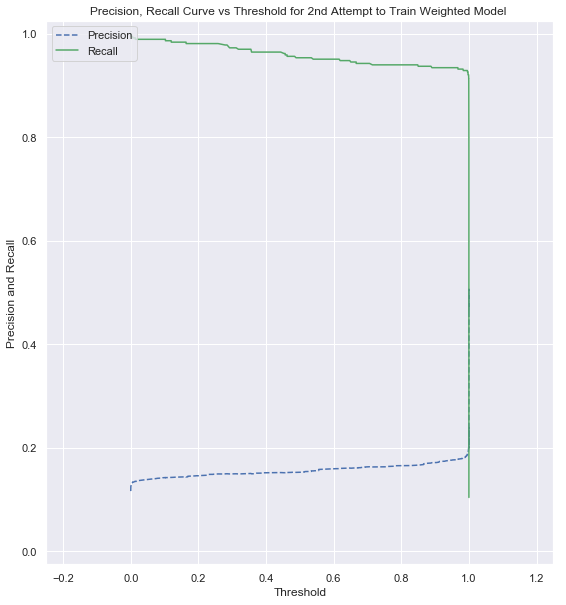

In [161]:
# get the best model with respect to recall
best_weight = 1000
xgb_model_best_wt_sofar = xgb_models[best_weight]


# use cross validation to find best model
xgb_predict_best_weighted_obj = find_cv_model_predict(xgb_model_best_wt_sofar, X_train, y_train, weight=best_weight)

xgb_best_wt_cls_1_proba = xgb_predict_best_weighted_obj['proba'][:,1]
xgb_best_wt_y_pred = xgb_predict_best_weighted_obj['pred']


print(xgb_best_wt_cls_1_proba)
print(xgb_best_wt_y_pred[10:100])

report_clf(y_train, xgb_best_wt_y_pred, xgb_best_wt_cls_1_proba, title="for 2nd Attempt to Train Weighted Model ", cmap="Greens")
plot_pr_vs_th(y_train, xgb_best_wt_cls_1_proba, show=True, tag="for 2nd Attempt to Train Weighted Model ")



### The recall for positive sample is way much better, as high as 95 %, good!

# Next, let's plot the relative feature importance for future work

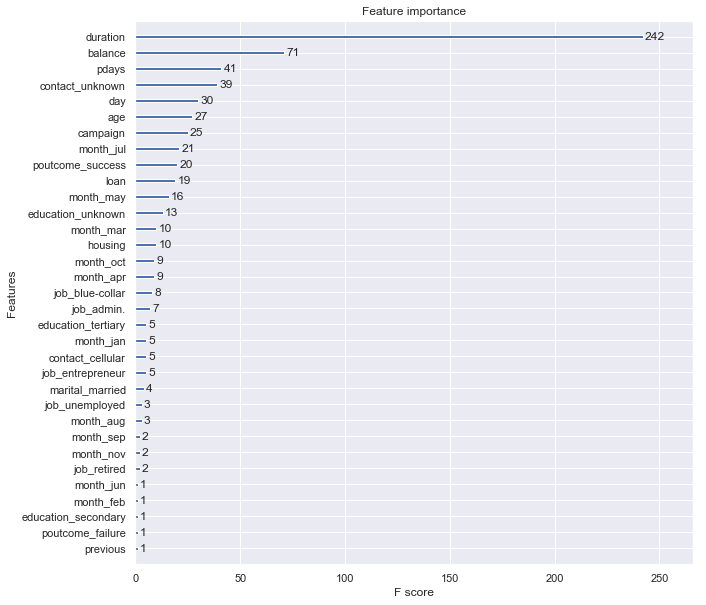

Feature importance =  [0.04103344 0.10790274 0.04559271 0.36778116 0.03799392 0.06231003
 0.00151976 0.         0.01519757 0.02887538 0.0106383  0.01215805
 0.00759878 0.         0.         0.00303951 0.         0.
 0.         0.         0.00455927 0.         0.         0.00607903
 0.         0.         0.00151976 0.00759878 0.01975684 0.00759878
 0.         0.05927052 0.01367781 0.00455927 0.         0.00151976
 0.00759878 0.03191489 0.00151976 0.01519757 0.02431611 0.00303951
 0.01367781 0.00303951 0.00151976 0.         0.03039514 0.        ]
Sorted Feature importance =  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00151976 0.00151976 0.00151976
 0.00151976 0.00151976 0.00303951 0.00303951 0.00303951 0.00455927
 0.00455927 0.00607903 0.00759878 0.00759878 0.00759878 0.00759878
 0.0106383  0.01215805 0.01367781 0.01367781 0.01519757 0.01519757
 0.01975684 0.02431611 0.02887538 

In [162]:




#xgb_model.fit(X_train, y_train, eval_metric='auc')

# get the best model with respect to recall
best_weight = 1000
xgb_model_best_sofar = xgb_models[best_weight]

# fit the whole training set. We will later run for the better model later, but for now. Lets go with it.
xgb_model_best_sofar.fit(X_train, y_train, eval_metric='auc')


# fit the model just in case
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(1,1,1)

plot_importance(xgb_model_best_sofar, ax=ax1)


# need graph viz package
#ax2 = fig.add_subplot(1,2,2)
#plot_tree(xgb_model, ax=ax2)

plt.show()

print("Feature importance = ", xgb_model_best_sofar.feature_importances_)
print("Sorted Feature importance = ", np.sort(xgb_model_best_sofar.feature_importances_))





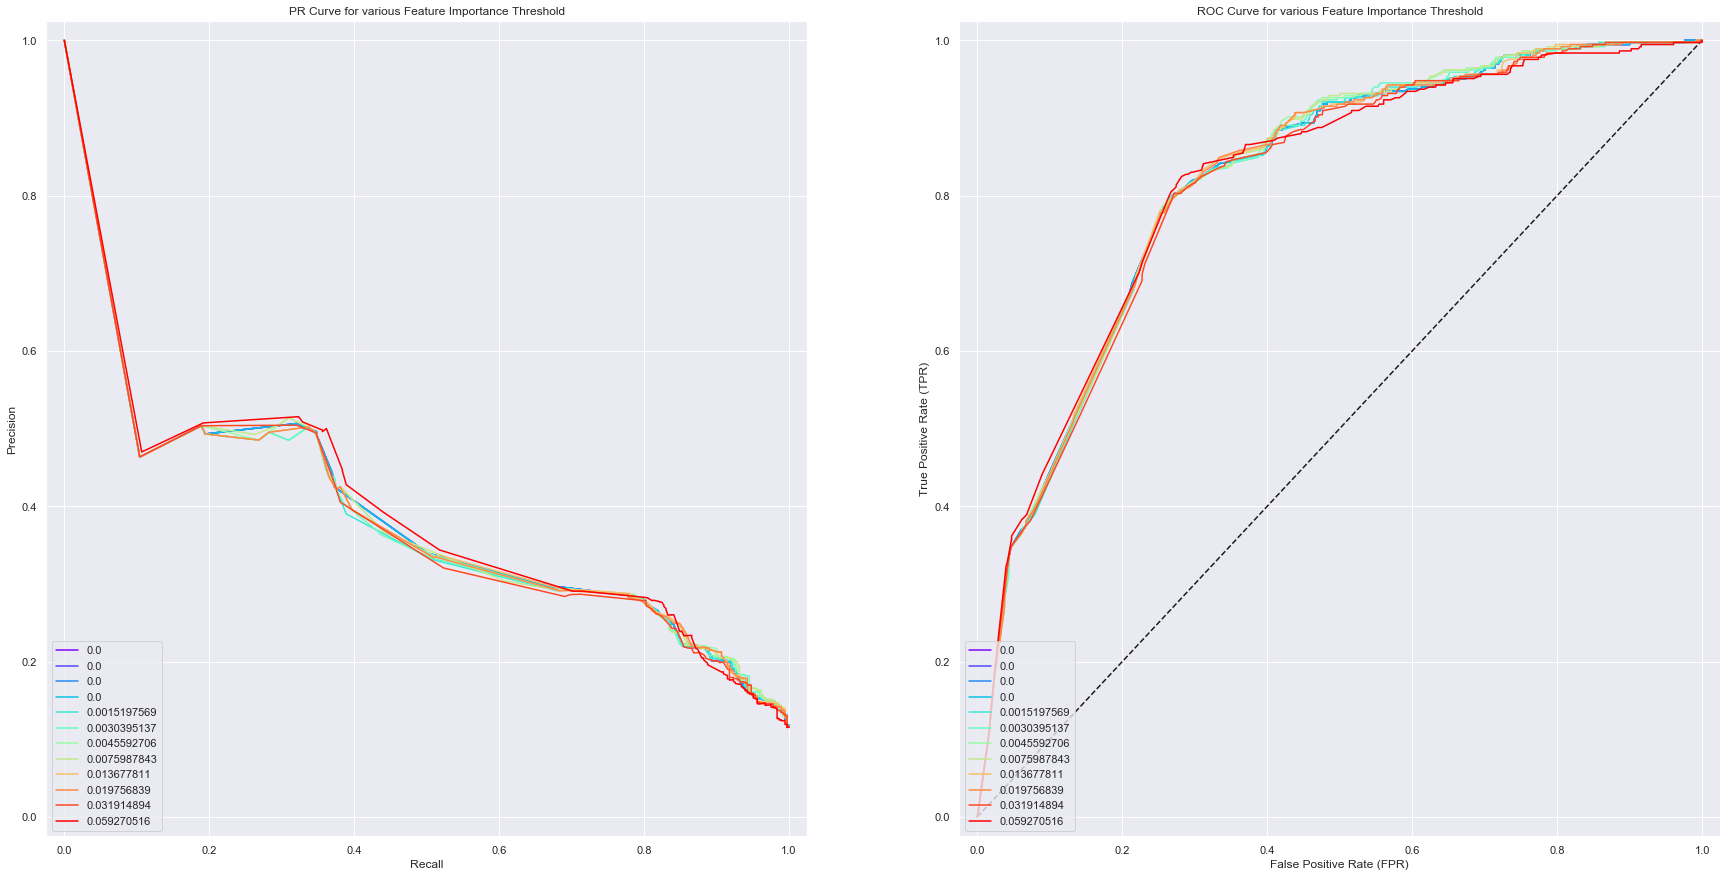

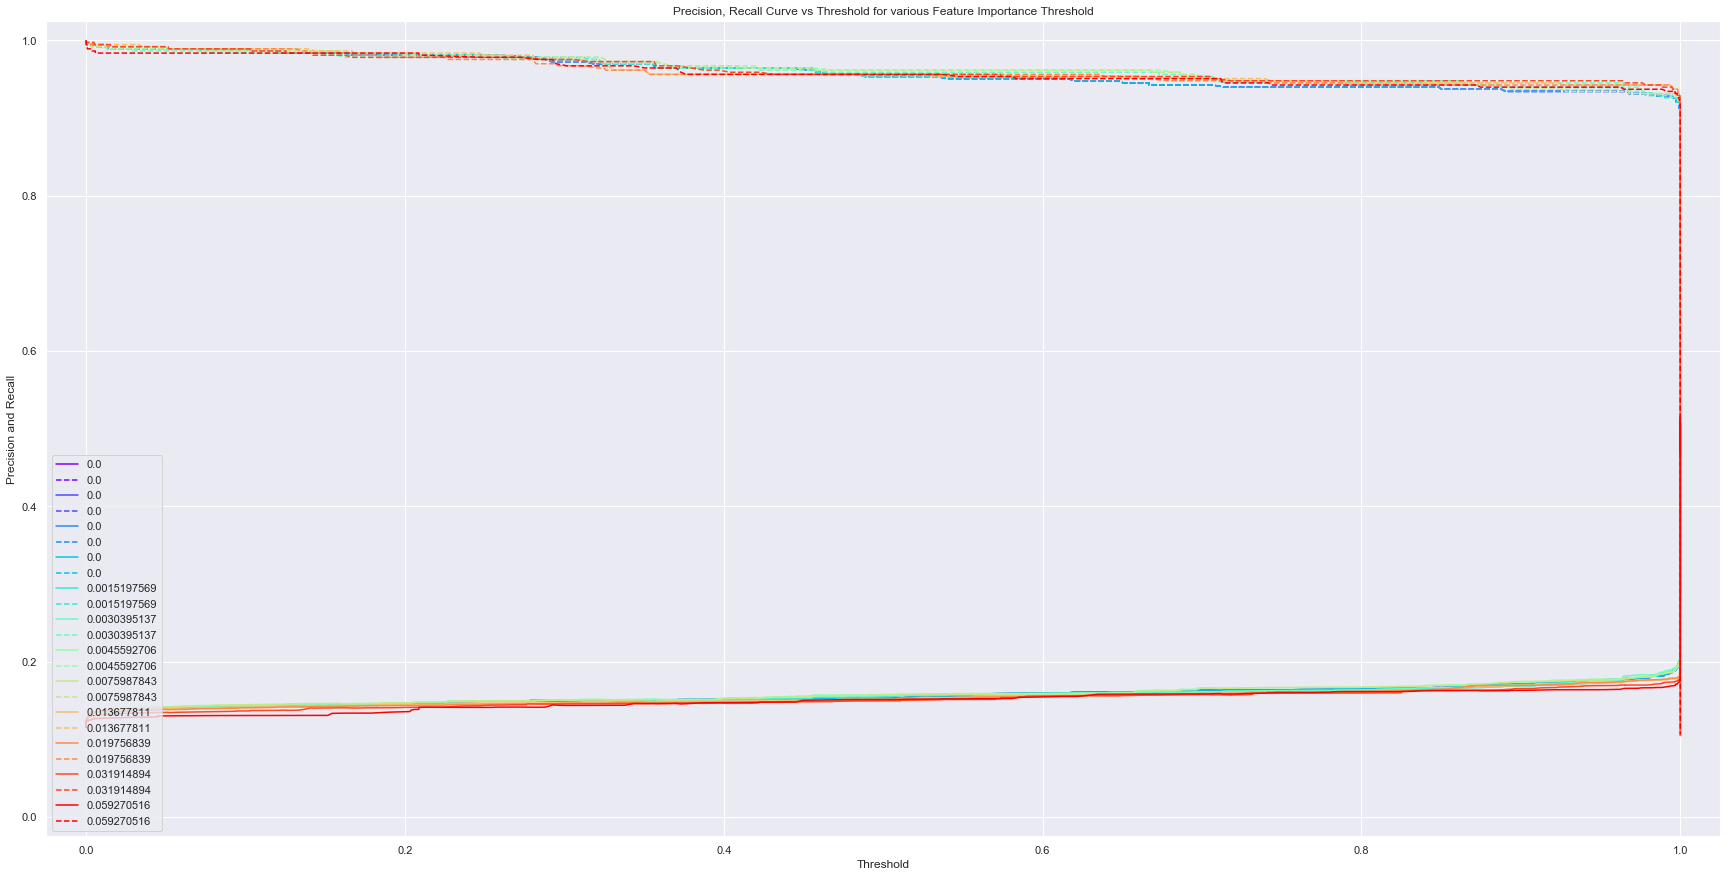

In [133]:


# setup the figure
fig1 = plt.figure(figsize=(30,15))

# plot one for PR curve
ax1 = fig1.add_subplot(1,2,1)
ax1.set_xlim([-0.025,1.025])
ax1.set_ylim([-0.025,1.025])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve for various Feature Importance Threshold')

# plot 2 for ROC curve
ax2 = fig1.add_subplot(1,2,2)
ax2.set_xlim([-0.025,1.025])
ax2.set_ylim([-0.025,1.025])
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('ROC Curve for various Feature Importance Threshold')

# plot the baseline ROC curve     
ax2.plot([0,1], [0,1], 'k--')
    

fig2 = plt.figure(figsize=(30,15))    
# plot 3 for precision recall vs threshold curve
ax3 = fig2.add_subplot(1,1,1)
ax3.set_xlim([-0.025,1.025])
ax3.set_ylim([-0.025,1.025])
ax3.set_xlabel('Threshold')
ax3.set_ylabel('Precision and Recall')
ax3.set_title('Precision, Recall Curve vs Threshold for various Feature Importance Threshold')



#lets explore various thresholds.
fi_thresholds = xgb_model_best_sofar.feature_importances_

fi_ths_sorted = np.sort(fi_thresholds)
ths_size = len(fi_ths_sorted)
ths_lim = 10 # threshold limits i.e the various values we want to try out.
if ths_size > ths_lim:
    # select only the thresholds
    step = int(len(fi_ths_sorted)/ths_lim)
    fi_ths_sorted = [fi_ths_sorted[i] for i in range(0, len(fi_ths_sorted), step)]
      
ths_size = len(fi_ths_sorted)   
colors = plt.cm.rainbow(np.linspace(0,1, ths_size))
        
# from best_weights
xgb_models_bm_fi = {}
select_txfs = {}
# try various weights and plot on the same figure for better comparasion
for fi_th, color in zip(fi_ths_sorted, colors):
  

  # train a transformer to select a feature based on threshold 50
  select_txf = SelectFromModel(xgb_model_best_sofar, threshold=fi_th, prefit=True)

  select_X_train = select_txf.transform(X_train)
  select_txfs[fi_th] = select_txf


  # create a model with pos_sample_weight and other default params
  xgb_model = create_xgb_clf({'scale_pos_weight':best_weight})
  
  # store the model for future use
  xgb_models_bm_fi[fi_th] = xgb_model
    
  # find the prediction with probabilities for pos_sample_weight
  xgb_predict_obj = find_cv_model_predict(xgb_model, select_X_train, y_train, weight=best_weight)

  xgb_cls_1_proba = xgb_predict_obj['proba'][:,1]
  xgb_y_pred = xgb_predict_obj['pred']
  y_act = y_train
  y_score = xgb_cls_1_proba
  label =  fi_th
  pr,rc, pr_th = precision_recall_curve(y_act, y_score)
  tpr,fpr,_ = roc_curve(y_act, y_score)
    
  ax1.plot(rc,pr,c=color,label=label)
  ax2.plot(tpr,fpr,c=color,label=label)
 
  ax3.plot(pr_th,pr[:-1], c=color,label=label)
  ax3.plot(pr_th,rc[:-1], "--", c=color,label=label)
    
    
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')
ax3.legend(loc='lower left')

plt.show()    

In [134]:
# train a transformer to select a feature based on threshold 50
select_txf = SelectFromModel(xgb_model_best_sofar, threshold=0.008, prefit=True)

select_X_train = select_txf.transform(X_train)




In [135]:

xgb_model_weighted = create_xgb_clf({'scale_pos_weight':best_weight})


#xgb_predict_obj = find_cv_model_predict(xgb_model, X_train, y_train, weight=1)
# use cross validation to find best model
xgb_predict_weighted_obj = find_cv_model_predict(xgb_model_weighted, select_X_train, y_train, weight=best_weight)

xgb_wt_cls_1_proba = xgb_predict_weighted_obj['proba'][:,1]
xgb_wt_y_pred = xgb_predict_weighted_obj['pred']


print(xgb_wt_cls_1_proba)
print(xgb_wt_y_pred[10:100])

[0.9999598  0.00102467 0.99997413 ... 0.99996305 0.9970999  0.9999038 ]
[1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


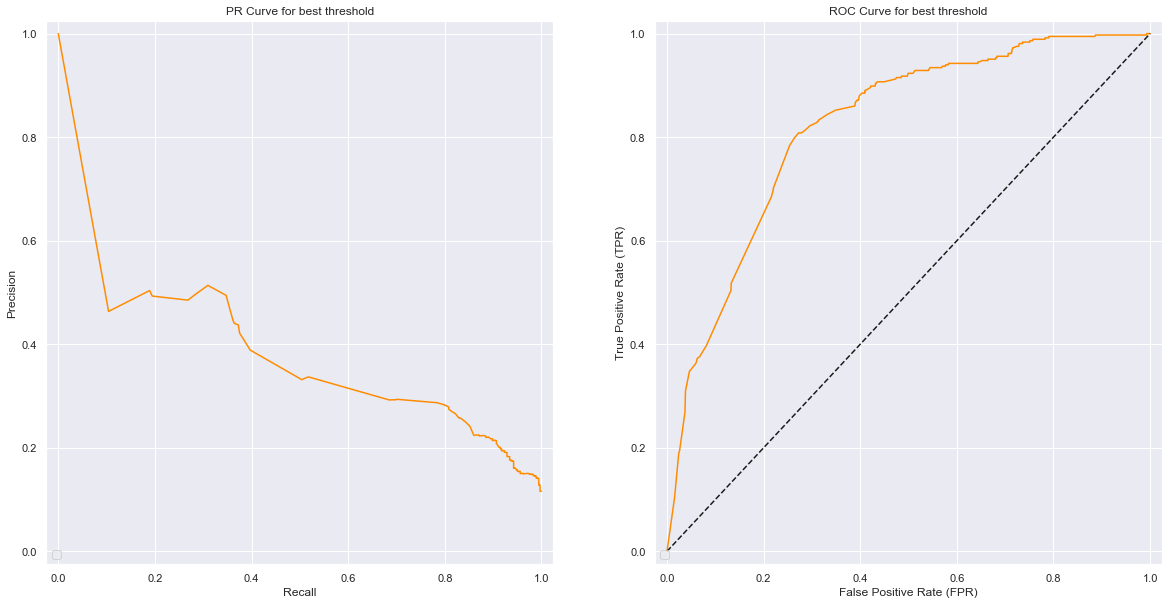

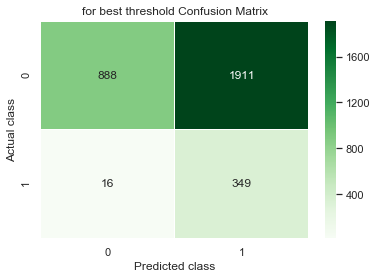



 Classification Report  for best threshold 


              precision    recall  f1-score   support

           0       0.98      0.32      0.48      2799
           1       0.15      0.96      0.27       365

   micro avg       0.39      0.39      0.39      3164
   macro avg       0.57      0.64      0.37      3164
weighted avg       0.89      0.39      0.45      3164



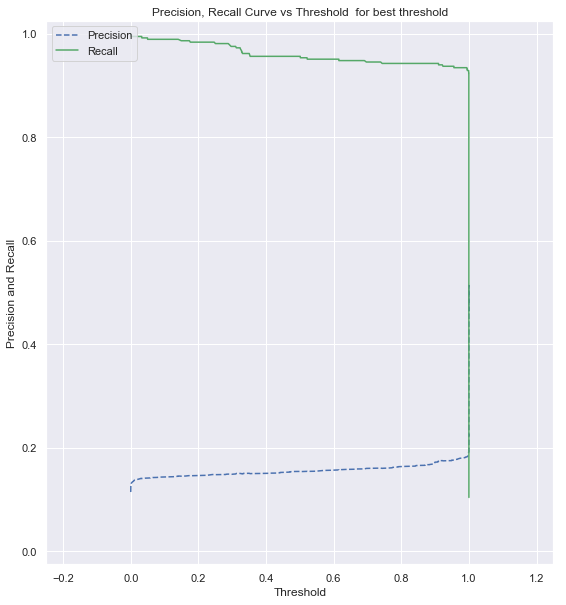

In [136]:
report_clf(y_train, xgb_wt_y_pred, xgb_wt_cls_1_proba, title="for best threshold", cmap="Greens")
plot_pr_vs_th(y_train, xgb_wt_cls_1_proba, show=True, tag=" for best threshold")

# After select only important feature, the result improved a little bit

To be continued....